<a href="https://colab.research.google.com/github/DarkSABBATH/AML_assignments/blob/main/assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#  Load Data
data = pd.read_csv('/content/Iris_Data.csv')

In [3]:
#  Select two classes for binary classification
binary_data = data[data['species'].isin(['Iris-setosa', 'Iris-versicolor'])].copy()

#  Encode labels: Setosa=0, Versicolor=1
binary_data['label'] = binary_data['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})

#  Use the first two features for visualization & training
X = binary_data[['sepal_length', 'sepal_width']].values
y = binary_data['label'].values

In [5]:
#  Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#  Train Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

#  Predict
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1 Score : 1.00


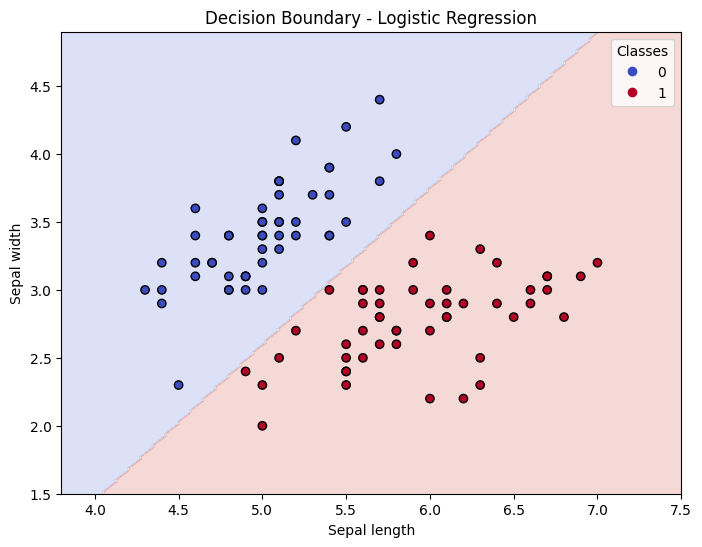

In [6]:


#  Visualize decision boundary
plt.figure(figsize=(8,6))
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundary - Logistic Regression')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()